ML prerequisite test
====================
Name: Chandrabhan Patel
Roll No: 22110057

### Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

### Answer: Number of multiplications: <mark>n*k*m </mark>
### Answer: Number of additions: <mark> (k-1)*m*n </mark>

### Q2.Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?



In [46]:
import numpy as np # importing numpy and creating arrays A and B
A= np.random.rand(100,200)
B = np.random.rand(200,300)



Time with custom matrix multiplication on multidimensional arrrays A and B

In [50]:
%%timeit
def matrix_multiplication(A, B):
    n, k = len(A), len(A[0])
    k, m = len(B), len(B[0])
    result = [[0] * m for _ in range(n)] 
    for i in range(n):
        for j in range(m):
            for l in range(k):
                result[i][j] += A[i][l] * B[l][j]
#                 print(i,l,j)                
    return result
matrix_multiplication(A,B)


20 s ± 4.63 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


Time with  numpy matrix multiplication function <mark>dot</mark> on multidimensional arrrays A and B

In [61]:
%%timeit
(np.dot(A,B))

312 µs ± 8.65 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Time with numpyy matrix multiplication funcition <mark>matmul</mark> on multidimensional arrrays A and B

In [60]:
%%timeit 
np.matmul(A,B)

306 µs ± 3.18 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Comment: For some cases I have found, python custom matrix multiplication is faster than numpy matrix multiplication functions. Unable to reproduce the same results now

### Q3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

### Answer: According to the method for finding highest and second highest element in list, the time complexity for finding median will be O(n^2).

In [90]:
# random array of statistcal data points 
# For simplification purpose took only odd numbers of data points 

n/2th pass median funciton  

In [64]:
%%timeit
lis=[5, 12, 34, 89, 2, 71, 48, 19, 43, 66,55,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500,2600]
def nth_pass_median(data):
    n = len(data)
    median_index = n // 2
    median = None
    for k in range(median_index+1):
        highest_so_far = -100000000000000000000
        for i in range(len(data)):
            if data[i] > highest_so_far:
                highest_so_far = data[i]
        if k==median_index:   
            median=highest_so_far  
        data.pop(data.index(highest_so_far))
    return median
nth_pass_median(lis)

25.7 µs ± 811 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Numpy method

In [62]:
%%timeit
lis=np.array([5, 12, 34, 89, 2, 71, 48, 19, 43, 66,55,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500,2600]) 
np.median(lis)

13.7 µs ± 1.44 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Better method

In [63]:
%%timeit
lis=[5, 12, 34, 89, 2, 71, 48, 19, 43, 66,55,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500,2600]
liss=sorted(lis)
liss[len(liss)//2]

657 ns ± 66.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


python <mark>list.sort() and sorted() </mark> functions use Timsort algorithm which is a hybrid of merge sort and insertion sort. The time complexity of Timsort is O(nlogn). So, the time complexity of finding median using list.sort() and sorted() functions will be O(nlogn).

### Q4. Find Gradient of the following function with respect to x and y
$$ x^2y+y^3sin(x) $$
### Sol. 

$$ \frac{\partial f}{\partial x} = 2xy + y^3cos(x) $$
$$ \frac{\partial f}{\partial y} = x^2 + 3y^2sin(x) $$



### Q5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y


In [ ]:
# ! pip install jax jaxlib

In [112]:
import jax
import jax.numpy as np


# Define the function
def my_function(x, y):
  return x**2 * y + y**3 * np.sin(x)  # Use np.sin for JAX compatibility

# Get gradients with respect to x and y separately
grad_x_my_function = jax.grad(my_function, argnums=0)  # Gradient w.r.t. x
grad_y_my_function = jax.grad(my_function, argnums=1)  # Gradient w.r.t. y

# Test gradients at a specific point
x_value = [2.0, 3.0, 4.0]
y_value = [1.5, 2.5, 3.5]  # Define a y_value for gradient calculation


for i in range(3):
    gradient_x_at_x = grad_x_my_function(x_value[i], y_value[i])
    gradient_y_at_x = grad_y_my_function(x_value[i], y_value[i])
    print(f"Function value at x={x_value[i]}, y={y_value[i]}: {my_function(x_value[i], y_value[i])}")
    print(f"Gradient with respect to x at x={x_value[i]}, y={y_value[i]}: {gradient_x_at_x}")
    print(f"Gradient with respect to y at x={x_value[i]}, y={y_value[i]}: {gradient_y_at_x}")
    print("")
# code debugged and commented by LaMBDA by Google   


Function value at x=2.0, y=1.5: 9.068878173828125
Gradient with respect to x at x=2.0, y=1.5: 4.595504283905029
Gradient with respect to y at x=2.0, y=1.5: 10.137757301330566

Function value at x=3.0, y=2.5: 24.704999923706055
Gradient with respect to x at x=3.0, y=2.5: -0.46863269805908203
Gradient with respect to y at x=3.0, y=2.5: 11.645999908447266

Function value at x=4.0, y=3.5: 23.552093505859375
Gradient with respect to x at x=4.0, y=3.5: -0.024969100952148438
Gradient with respect to y at x=4.0, y=3.5: -11.812492370605469



### Q6. Use sympy to confirm that you obtain the same gradient analytically.

In [116]:
import sympy 
x,y=sympy.symbols('x y')
f=x**2 * y + y**3 * sympy.sin(x)

grad_x=sympy.diff(f,x)
grad_y=sympy.diff(f,y)

print(f'Gradient with respect to x: {grad_x}')
print(f'Gradient with respect to y: {grad_y}')


Gradient with respect to x: 2*x*y + y**3*cos(x)
Gradient with respect to y: x**2 + 3*y**2*sin(x)


This is the same as the one done analytically and values also match with jax's answers for random values of x and y

### Q7. Create a Python nested dictionary ...


In [121]:
dictionary={
    '2022':{"Branch 1":{"Roll No.":1,"Name":"N","Marks":{"Maths":100,"English":70,"Computer":100}},
            "Branch 2":{"Roll No.":2,"Name":"M","Marks":{"Maths":100,"English":70,"Computer":100}}},
    '2023':{"Branch 1":{},"Branch 2":{}},
    '2024':{"Branch 1":{},"Branch 2":{}},
    '2025':{"Branch 1":{},"Branch 2":{}}
}
dictionary

{'2022': {'Branch 1': {'Roll No.': 1,
   'Name': 'N',
   'Marks': {'Maths': 100, 'English': 70, 'Computer': 100}},
  'Branch 2': {'Roll No.': 2,
   'Name': 'M',
   'Marks': {'Maths': 100, 'English': 70, 'Computer': 100}}},
 '2023': {'Branch 1': {}, 'Branch 2': {}},
 '2024': {'Branch 1': {}, 'Branch 2': {}},
 '2025': {'Branch 1': {}, 'Branch 2': {}}}

### Q8. Store the same information using Python Classes ...

In [133]:
class Year:
    def __init__(self, year):
        self.year = year
        self.branches = [] 

class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

database = []

year_2022 = Year(2022)
branch_1 = Branch("Branch 1")
student_1 = Student(1, "N", {"Maths": 100, "English": 70})
branch_1.students.append(student_1)
year_2022.branches.append(branch_1)
database.append(year_2022)

print(database[0].branches[0].students[0].marks)

{'Maths': 100, 'English': 70}


### Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5


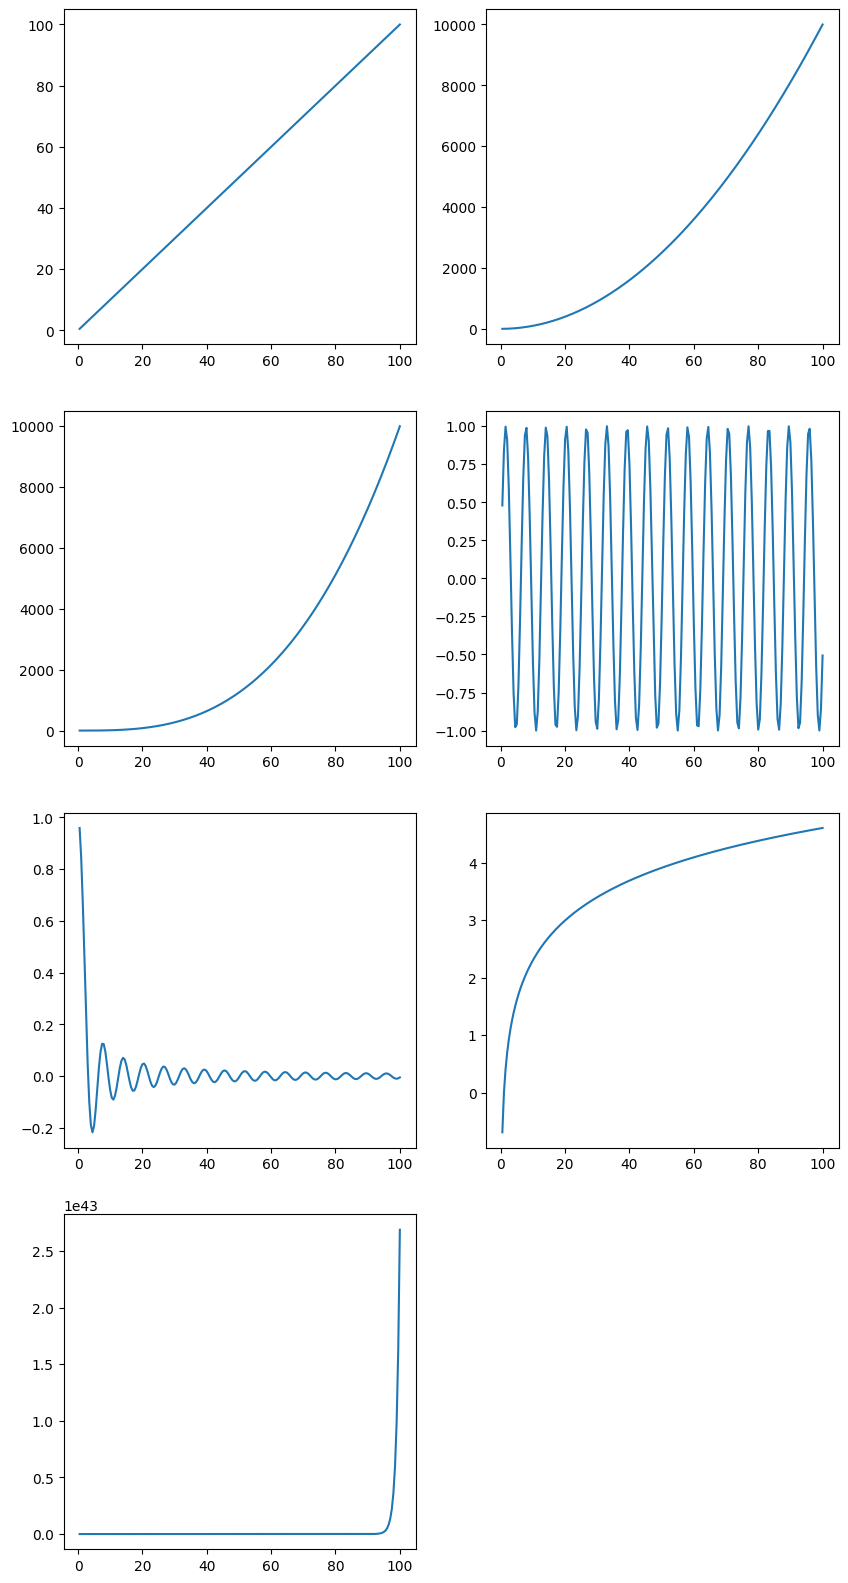

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(0.5,100,200)

def f1(x):
    return x
def f2(x):
    return x**2
def f3(x):
    return (x**3)/100
def f4(x):
    return np.sin(x)
def f5(x):
    return np.sin(x)/x
def f6(x):
    return np.log(x)
def f7(x):
    return np.exp(x)

plt.figure(figsize=(10,20))
plt.subplot(4,2,1)
plt.plot(x,f1(x))
plt.subplot(4,2,2)
plt.plot(x,f2(x))
plt.subplot(4,2,3)
plt.plot(x,f3(x))
plt.subplot(4,2,4)
plt.plot(x,f4(x))
plt.subplot(4,2,5)
plt.plot(x,f5(x))
plt.subplot(4,2,6)
plt.plot(x,f6(x))
plt.subplot(4,2,7)
plt.plot(x,f7(x))
plt.show()

##### Q10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean

In [31]:
import numpy as np
import pandas as pd
np.random.seed(0)


x = np.random.rand(20, 5) + 1
df=pd.DataFrame(x,columns=['A','B','C','D','E'])

for i in ['A','B','C','D','E']:
    print(f"Standard deviation of column {i}: {np.std(df[i])}")

for i in range(20):
    print(f"Mean of row {i}: {np.mean(df.iloc[i,:])}")

print(f"Row with minimum mean: {np.argmin(np.mean(x,axis=1))}")
print(f"Column with max standard deviation: {df.columns[np.argmax(np.std(x,axis=0))]}")


Standard deviation of column A: 0.2744435665894459
Standard deviation of column B: 0.2281242756419924
Standard deviation of column C: 0.3347694245864291
Standard deviation of column D: 0.27392221903981945
Standard deviation of column E: 0.2787674738817464
Mean of row 0: 1.5670608457414381
Mean of row 1: 1.6644717208876472
Mean of row 2: 1.5770594430840097
Mean of row 3: 1.517627288377295
Mean of row 4: 1.6276119741715616
Mean of row 5: 1.53289069750535
Mean of row 6: 1.4164326766120792
Mean of row 7: 1.694446718858233
Mean of row 8: 1.4442326474750662
Mean of row 9: 1.337817170042732
Mean of row 10: 1.4616187377564578
Mean of row 11: 1.3556891621496172
Mean of row 12: 1.252087925460753
Mean of row 13: 1.4441725983389453
Mean of row 14: 1.7531961707989563
Mean of row 15: 1.1714118465040577
Mean of row 16: 1.411093448766805
Mean of row 17: 1.4775641496593959
Mean of row 18: 1.4247020983770327
Mean of row 19: 1.3246894696829208
Row with minimum mean: 15
Column with max standard deviation:

##### Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [34]:

df['f']=df['A']+df['B']+df['C']+df['D']+df['E']
df['g']=np.where(df['f']<8,'LT8','GT8')
print(f"Number of rows where g=LT8: {len(df[df['g']=='LT8'])}")

print(f"Standard deviation of column f where g=LT8: {np.std(df[df['g']=='LT8']['f'])}")
print(f"Standard deviation of column f where g=GT8: {np.std(df[df['g']=='GT8']['f'])}")


Number of rows where g=LT8: 16
Standard deviation of column f where g=LT8: 0.5374491454217214
Standard deviation of column f where g=GT8: 0.22987408607278592


### Q12. Write a small piece of code to explain broadcasting in numpy.

In [39]:
#broadcasting feature of numpy is useful when we want to perform some operation on two arrays of different shapes
import numpy as np
a=np.array([[1,2,3],[4,5,6]])
b=np.array([[1,2,3]])
print(f"Shape of a: {a.shape}")
print(f"Shape of b: {b.shape}")
print(f"Shape of a+b: {(a+b).shape}") 
print(f"Shape of a*b: {(a*b).shape}")

#although the shapes of a and b are different, the operation still works
# if we try operation with size of array a (3,3) and array b (2,3) then it will throw an error

Shape of a: (2, 3)
Shape of b: (1, 3)
Shape of a+b: (2, 3)
Shape of a*b: (2, 3)


##### Q13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [45]:
np.argmin
import numpy as np
# write custom argmin function 
def argmin(array):
    for i in range(len(array)):
        if array[i]==min(array):
            return i
arr=np.array([2,3,1,5,6,7,8,9,10])
print(f'Custom argmin\'s answer: {argmin(arr)}')
print(f'Numpy argmin\'s answer: {np.argmin(arr)}')


Custom argmin's answer: 2
Numpy argmin's answer: 2
